# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as plt3d

# Fetching the dataset

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

# Printing the first few rows of the Dataset

In [3]:
print(iris.DESCR)
# print(iris.data)
print(iris.target)
pd.DataFrame(iris.data).head()

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Creating the feature-matrix and dependant vector

In [4]:
X = iris.data
Y = iris.target

# Creating the Testing and Training sets

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 5)

# Creating a KNN Classifier 

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=7, algorithm = 'auto')
model.fit(X_train, y_train)
fx = model.predict(X_test)
print(accuracy_score(fx, y_test))

0.9666666666666667


# Creating a CART Classifier (Decision Tree Clasifier)
Scikit-learn uses an optimized version of the CART algorithm.

In [7]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
CART_tree = tree.DecisionTreeClassifier()
r = CART_tree.fit(X_train, y_train)
fx = CART_tree.predict(X_test)
print(accuracy_score(fx, y_test))

0.9333333333333333


# Plotting the decision tree

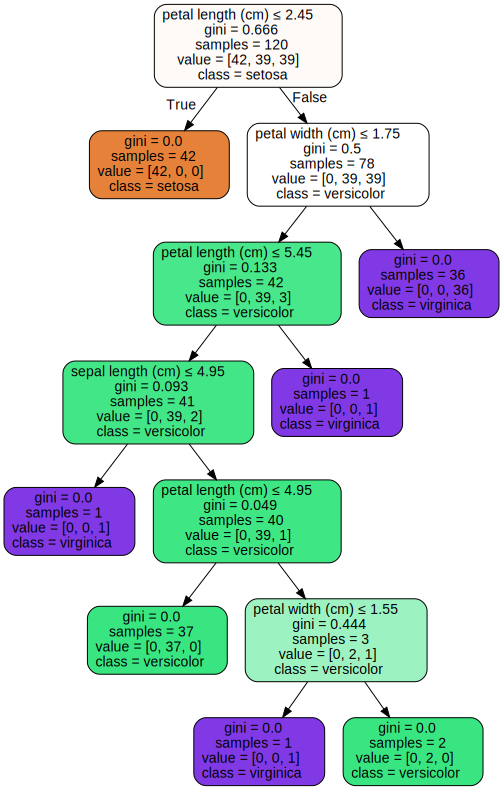

In [8]:
import graphviz
dot_data = tree.export_graphviz(CART_tree, out_file=None, feature_names=iris.feature_names,  class_names=iris.target_names,  
                                filled=True, rounded=True,  special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 

# Bagging Classifier with the base learner as Decision Tree Classifier
Default classifier is Decision Tree Classifier

In [9]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(n_estimators = 20, oob_score = True)
model.fit(X, Y)
fx = model.predict(X)
print("Out of bag score:", model.oob_score_)

Out of bag score: 0.9533333333333334


# Bagging Classifier with the base learner as KNN

In [10]:
model = BaggingClassifier(base_estimator= KNeighborsClassifier(), n_estimators = 20,
                         oob_score = True)
model.fit(X,Y)
print("Out of bag score:", model.oob_score_)

Out of bag score: 0.96


# Random Forest Classifier 

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth = 2, criterion = "gini",
                              oob_score = True, )
model.fit(X, Y)

print("Out of bag score:", model.oob_score_)

Out of bag score: 0.94
